In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
import warnings
from collections import Counter

## Part 1 - Data Cleaning ##

In [3]:
### Merging the article and price datasets ###
df =pd.read_csv('article.csv')
df1 =pd.read_csv('price.csv')
df2=pd.read_csv('additional.csv')
df3=pd.read_csv('extra.csv')

In [4]:
new =pd.merge(left=df, right=df1, left_on="link", right_on="link")
new = new.drop_duplicates(subset="link", keep="first")
new =pd.merge(left=new, right=df2, left_on="link", right_on="link")
new =pd.merge(left=new, right=df3, left_on="link", right_on="link")
new.to_csv(r'C:\Users\user\Desktop\DM Project\merge.csv', index=False, header=True)
new.head()

,id,model,make,version,year,mileage,transmission,link,Price,Engine Capacity,...,Colour,Bore(mm),Stroke(mm),Power(hp),Compression Ratio,Peak Torque(Nm),Length(mm),Width(mm),Height(mm),Fuel Tank (litres)
0,6555771,E200K,Mercedes-Benz,2007 Mercedes-Benz E200K 1.8 Elegance Sedan,2007,107500,Automatic,https://www.carlist.my/used-cars/2007-mercedes...,"RM 32,999",1796 cc,...,Silver,82.0,85.0,184.0,9.5,240.0,4818.0,1822.0,1452.0,65.0
1,6555308,C200K,Mercedes-Benz,2004 Mercedes-Benz C200K 1.8 Avantgarde Sedan,2004,122500,Automatic,https://www.carlist.my/used-cars/2004-mercedes...,"RM 21,500",1796 cc,...,Blue,82.0,85.0,163.0,9.5,240.0,4526.0,1728.0,1426.0,62.0
2,6555277,2,Mazda,2017 Mazda 2 1.5 SKYACTIV-G Sedan,2017,62500,Automatic,https://www.carlist.my/used-cars/2017-mazda-2-...,"RM 59,500",1496 cc,...,Red,74.5,85.8,116.0,14.0,148.0,4320.0,1695.0,1470.0,44.0
3,6635009,Vios,Toyota,2014 Toyota Vios 1.5 E Sedan,2014,102500,Automatic,https://www.carlist.my/used-cars/2014-toyota-v...,"RM 49,800",1497 cc,...,White,NaN,NaN,109.0,NaN,141.0,4410.0,1700.0,1475.0,42.0
4,6649237,CR-V,Honda,2013 Honda CR-V 2.0 i-VTEC SUV,2013,77500,Automatic,https://www.carlist.my/used-cars/2013-honda-cr...,"RM 72,800",1997 cc,...,Grey,81.0,96.9,155.0,10.6,190.0,4545.0,1820.0,1685.0,58.0


In [5]:
missing_values = ["n/a", "na", "--", "nan", "-","NA", "NaN", " "]
df4 = pd.read_csv("merge.csv", na_values = missing_values)
print (df4.isnull().sum())

id                       0
model                    0
make                     0
version                  0
year                     0
mileage                  0
transmission             0
link                     0
Price                    0
Engine Capacity          0
Seat Capacity            0
Colour                 354
Bore(mm)              7463
Stroke(mm)            7296
Power(hp)              217
Compression Ratio     7835
Peak Torque(Nm)        321
Length(mm)             381
Width(mm)              413
Height(mm)             446
Fuel Tank (litres)    1625
dtype: int64


In [6]:
#Explore nulls
df4.columns
print(df4.isnull().sum())
#Fill nulls with Unknown 
df4['Colour'].fillna(value='Unknown', inplace=True)
print(df4.isnull().sum())

id                       0
model                    0
make                     0
version                  0
year                     0
mileage                  0
transmission             0
link                     0
Price                    0
Engine Capacity          0
Seat Capacity            0
Colour                 354
Bore(mm)              7463
Stroke(mm)            7296
Power(hp)              217
Compression Ratio     7835
Peak Torque(Nm)        321
Length(mm)             381
Width(mm)              413
Height(mm)             446
Fuel Tank (litres)    1625
dtype: int64
id                       0
model                    0
make                     0
version                  0
year                     0
mileage                  0
transmission             0
link                     0
Price                    0
Engine Capacity          0
Seat Capacity            0
Colour                   0
Bore(mm)              7463
Stroke(mm)            7296
Power(hp)              217
Compression Rat

In [7]:
#Drop columns (useless/too many nulls)
df4.drop(columns=['version','link', 'Bore(mm)','Stroke(mm)','Compression Ratio'], inplace=True)
print(df4.isnull().sum())
#Drop Duplicates
df4.drop_duplicates(inplace=True)
print(df4.isnull().sum())

id                       0
model                    0
make                     0
year                     0
mileage                  0
transmission             0
Price                    0
Engine Capacity          0
Seat Capacity            0
Colour                   0
Power(hp)              217
Peak Torque(Nm)        321
Length(mm)             381
Width(mm)              413
Height(mm)             446
Fuel Tank (litres)    1625
dtype: int64
id                       0
model                    0
make                     0
year                     0
mileage                  0
transmission             0
Price                    0
Engine Capacity          0
Seat Capacity            0
Colour                   0
Power(hp)              217
Peak Torque(Nm)        321
Length(mm)             381
Width(mm)              413
Height(mm)             446
Fuel Tank (litres)    1625
dtype: int64


In [8]:
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24575 entries, 0 to 24574
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  24575 non-null  int64  
 1   model               24575 non-null  object 
 2   make                24575 non-null  object 
 3   year                24575 non-null  int64  
 4   mileage             24575 non-null  int64  
 5   transmission        24575 non-null  object 
 6   Price               24575 non-null  object 
 7   Engine Capacity     24575 non-null  object 
 8   Seat Capacity       24575 non-null  int64  
 9   Colour              24575 non-null  object 
 10  Power(hp)           24358 non-null  float64
 11  Peak Torque(Nm)     24254 non-null  float64
 12  Length(mm)          24194 non-null  float64
 13  Width(mm)           24162 non-null  float64
 14  Height(mm)          24129 non-null  float64
 15  Fuel Tank (litres)  22950 non-null  float64
dtypes: f

In [9]:
#Data transformation(price and engine capacity should be in float)
df4['Engine Capacity'] = df4['Engine Capacity'].replace('cc','',regex=True).astype(float)
df4['mileage'] = df4['mileage'].astype(float)
df4['Price'] = df4['Price'].replace('[RM,]', '',regex=True).astype(float)
df4['Seat Capacity'] = df4['Seat Capacity'].astype(float)
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24575 entries, 0 to 24574
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  24575 non-null  int64  
 1   model               24575 non-null  object 
 2   make                24575 non-null  object 
 3   year                24575 non-null  int64  
 4   mileage             24575 non-null  float64
 5   transmission        24575 non-null  object 
 6   Price               24575 non-null  float64
 7   Engine Capacity     24575 non-null  float64
 8   Seat Capacity       24575 non-null  float64
 9   Colour              24575 non-null  object 
 10  Power(hp)           24358 non-null  float64
 11  Peak Torque(Nm)     24254 non-null  float64
 12  Length(mm)          24194 non-null  float64
 13  Width(mm)           24162 non-null  float64
 14  Height(mm)          24129 non-null  float64
 15  Fuel Tank (litres)  22950 non-null  float64
dtypes: f

In [10]:
df5 = df4.copy()

In [11]:
#Imputate remaining missing values based on make
median = df5['Fuel Tank (litres)'].median()
df5['Fuel Tank (litres)'].fillna(median, inplace=True)
df5.isnull().sum()

id                      0
model                   0
make                    0
year                    0
mileage                 0
transmission            0
Price                   0
Engine Capacity         0
Seat Capacity           0
Colour                  0
Power(hp)             217
Peak Torque(Nm)       321
Length(mm)            381
Width(mm)             413
Height(mm)            446
Fuel Tank (litres)      0
dtype: int64

In [12]:
#Drop nulls for remaining columns 
df5.dropna(inplace=True)
print(df5.isnull().sum())

id                    0
model                 0
make                  0
year                  0
mileage               0
transmission          0
Price                 0
Engine Capacity       0
Seat Capacity         0
Colour                0
Power(hp)             0
Peak Torque(Nm)       0
Length(mm)            0
Width(mm)             0
Height(mm)            0
Fuel Tank (litres)    0
dtype: int64


In [13]:
dfnew = df5.copy()

In [14]:
dfnew = dfnew.rename(columns ={"mileage": "mileage_kms", "Price": "price",
                       "Engine Capacity": "engine_capacity", 
                       "Seat Capacity": "seat_capacity", "Colour": "colour",                                        
                       "Power(hp)": "power_hp", "Peak Torque(Nm)": "peak_torque_nm", 
                       "Length(mm)": "length", "Width(mm)": "width", "Height(mm)": "height",
                       "Fuel Tank (litres)": "fuel_tanks_litres"})
dfnew.head()

,id,model,make,year,mileage_kms,transmission,price,engine_capacity,seat_capacity,colour,power_hp,peak_torque_nm,length,width,height,fuel_tanks_litres
0,6555771,E200K,Mercedes-Benz,2007,107500.0,Automatic,32999.0,1796.0,5.0,Silver,184.0,240.0,4818.0,1822.0,1452.0,65.0
1,6555308,C200K,Mercedes-Benz,2004,122500.0,Automatic,21500.0,1796.0,5.0,Blue,163.0,240.0,4526.0,1728.0,1426.0,62.0
2,6555277,2,Mazda,2017,62500.0,Automatic,59500.0,1496.0,5.0,Red,116.0,148.0,4320.0,1695.0,1470.0,44.0
3,6635009,Vios,Toyota,2014,102500.0,Automatic,49800.0,1497.0,5.0,White,109.0,141.0,4410.0,1700.0,1475.0,42.0
4,6649237,CR-V,Honda,2013,77500.0,Automatic,72800.0,1997.0,5.0,Grey,155.0,190.0,4545.0,1820.0,1685.0,58.0


In [15]:
dfnew.describe()

,id,year,mileage_kms,price,engine_capacity,seat_capacity,power_hp,peak_torque_nm,length,width,height,fuel_tanks_litres
count,2.399600e+04,23996.000000,23996.000000,2.399600e+04,23996.000000,23996.000000,23996.000000,23996.000000,23996.000000,23996.000000,23996.000000,23996.000000
mean,6.449007e+06,2012.266836,78749.849225,7.708816e+04,1953.065053,5.320762,161.280797,225.839807,4514.787423,1780.625313,1556.299508,56.902317
std,2.501639e+05,3.815119,38293.668765,1.040727e+05,635.836098,1.049476,72.988117,102.378282,610.941403,143.495791,140.775411,13.458415
min,2.384984e+06,1993.000000,1.000000,2.700000e+03,658.000000,2.000000,31.000000,49.000000,1665.000000,1395.000000,1135.000000,32.000000
25%,6.390907e+06,2010.000000,57500.000000,2.899900e+04,1497.000000,5.000000,109.000000,145.000000,4300.000000,1699.000000,1460.000000,45.000000
50%,6.510290e+06,2013.000000,77500.000000,4.780000e+04,1969.000000,5.000000,150.000000,198.000000,4543.000000,1786.000000,1501.000000,55.000000
75%,6.602091e+06,2015.000000,97500.000000,8.580000e+04,1999.000000,5.000000,184.000000,270.000000,4795.000000,1835.000000,1660.000000,66.000000
max,6.699642e+06,2020.000000,500000.000000,2.680000e+06,6749.000000,15.000000,740.000000,1000.000000,33895.000000,4855.000000,2300.000000,150.000000


In [16]:
dfnew.to_csv(r'C:\Users\user\Desktop\DM Project\clean_null.csv', index=False, header=True)

## Part 2 - Data Preprocessing & Exploratory Analysis ##

#### Distribution Plots ####

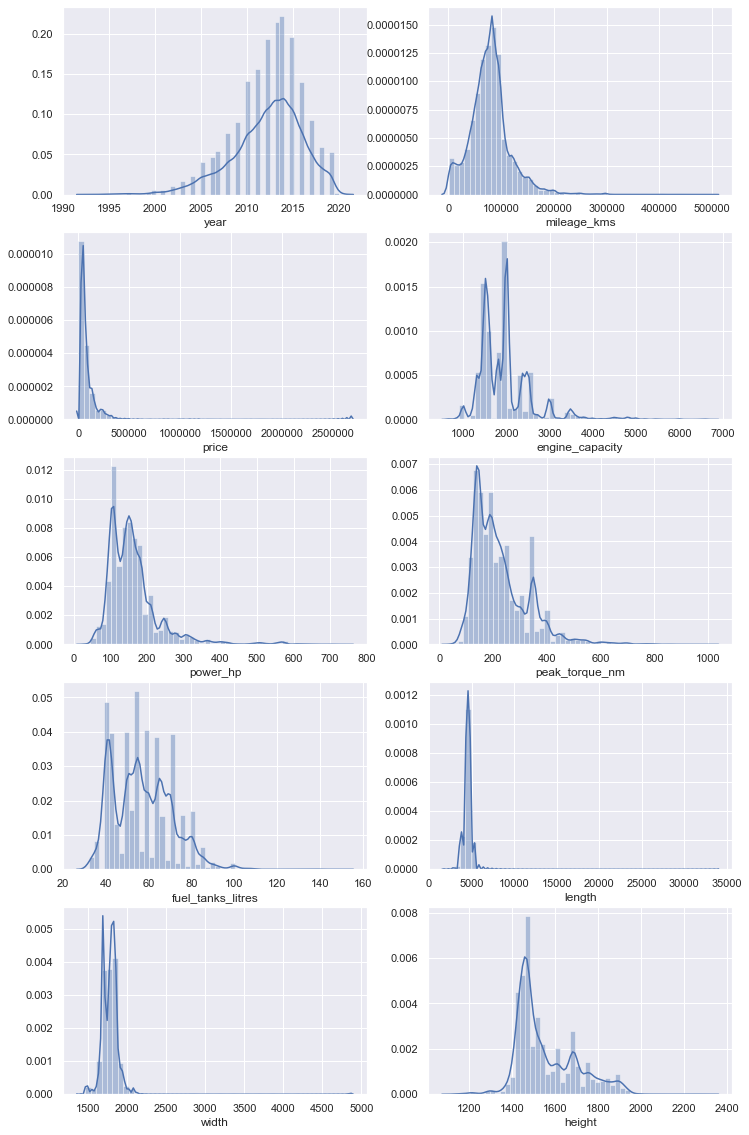

In [19]:
# Plotting out distributions for the numeric variables to see whether they are normally distributed
warnings.filterwarnings("ignore")
sns.set()
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(ncols=2,nrows=5,figsize=(12,20)) 
sns.distplot(dfnew['year'],ax=ax1);
sns.distplot(dfnew['mileage_kms'],ax=ax2);
sns.distplot(dfnew['price'],ax=ax3);            
sns.distplot(dfnew['engine_capacity'],ax=ax4);
sns.distplot(dfnew['power_hp'],ax=ax5);
sns.distplot(dfnew['peak_torque_nm'], ax=ax6);
sns.distplot(dfnew['fuel_tanks_litres'],ax=ax7);
sns.distplot(dfnew['length'],ax=ax8);
sns.distplot(dfnew['width'],ax=ax9);
sns.distplot(dfnew['height'],ax=ax10);

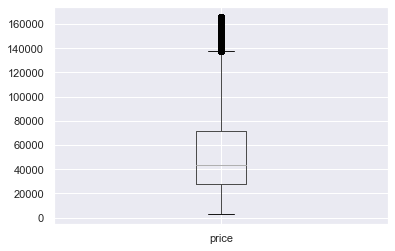

In [20]:
dfnew = dfnew[dfnew['price'].between(2700, 600000)] # Computing IQR
Q1 = dfnew['price'].quantile(0.25)
Q3 = dfnew['price'].quantile(0.75)
IQR = Q3 - Q1
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
dfnew = dfnew.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
dfnew.boxplot('price')

In [21]:
dfnew.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,year,mileage_kms,price,engine_capacity,seat_capacity,power_hp,peak_torque_nm,length,width,height,fuel_tanks_litres
count,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000,21823.000000
mean,6452547.265271,2011.889658,83247.906337,54203.393163,1887.800806,5.365578,148.384136,208.765202,4493.451863,1770.776520,1558.060028,55.882143
std,247433.285571,3.697678,36271.046346,35693.530271,541.459505,1.031211,51.984674,83.368860,628.906501,145.341061,136.981566,13.014710
min,2384984.000000,1993.000000,1.000000,2700.000000,658.000000,2.000000,31.000000,49.000000,1665.000000,1395.000000,1170.000000,32.000000
25%,6394345.000000,2010.000000,62500.000000,27800.000000,1497.000000,5.000000,109.000000,145.000000,4294.000000,1695.000000,1460.000000,43.000000
50%,6520081.000000,2012.000000,82500.000000,43800.000000,1798.000000,5.000000,143.000000,190.000000,4530.000000,1775.000000,1510.000000,55.000000
75%,6602351.500000,2014.000000,97500.000000,71800.000000,1998.000000,5.000000,170.000000,250.000000,4769.000000,1822.000000,1660.000000,65.000000
max,6699175.000000,2020.000000,500000.000000,166000.000000,5998.000000,15.000000,647.000000,720.000000,33895.000000,4855.000000,2300.000000,150.000000


#### Frequency Plots ####

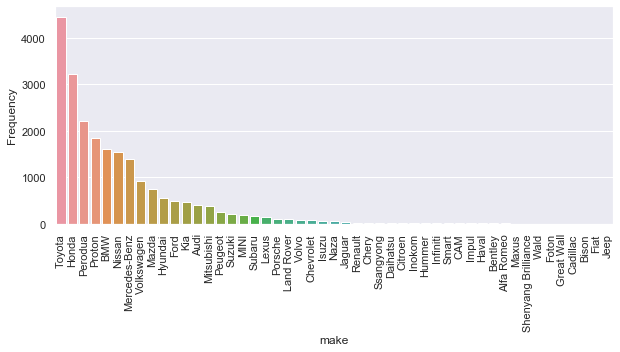

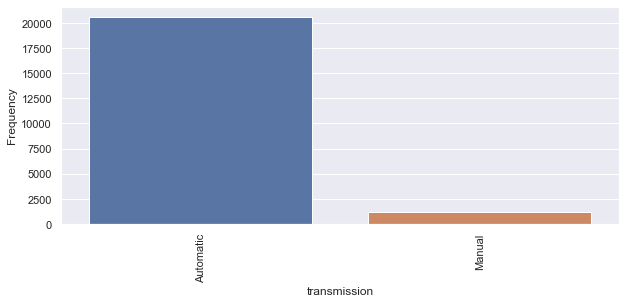

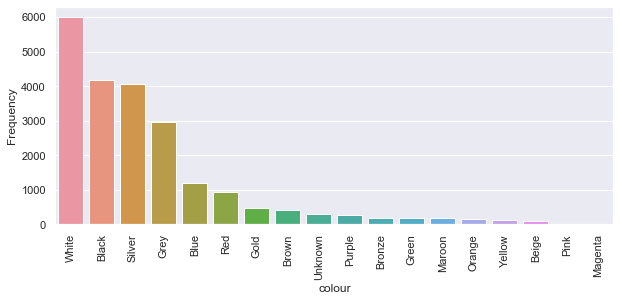

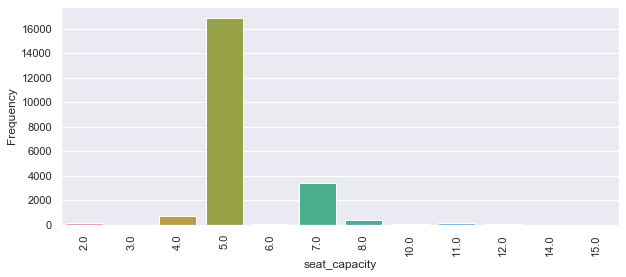

In [22]:
categories = ['make','transmission', 'colour', 'seat_capacity'] 
# categorical features used in my analysis
ranges = [0,1,2,3,4] 
counts = []
x = []
y = []
for i,j in zip(ranges,categories):
    z = dfnew.groupby([j])['id'].count().sort_values(ascending=False).reset_index()
    counts.append(z)
    x.append(counts[i][j])
    y.append(counts[i]['id'])
    plt.figure(figsize=(10,4))
    sns.barplot(x[i],y[i])
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)

#### Further Cleaning Process ####

In [23]:
#Cleaning mileage
dfnew = dfnew.drop(dfnew[dfnew.mileage_kms>300000].index)

In [24]:
#Cleaning make
print(dfnew.groupby(['make'])['id'].count().sort_values(ascending=True).reset_index())

                   make    id
0                  Jeep     1
1                  Fiat     1
2                 Bison     1
3              Cadillac     1
4            Great Wall     2
5                 Foton     2
6                  Wald     2
7   Shenyang Brilliance     3
8                 Maxus     3
9            Alfa Romeo     4
10              Bentley     4
11                Haval     4
12                Impul     4
13                  CAM     5
14                Smart     7
15             Infiniti     7
16               Hummer     8
17               Inokom     8
18              Citroen     9
19             Daihatsu    11
20            Ssangyong    13
21                Chery    13
22              Renault    20
23               Jaguar    26
24                 Naza    60
25                Isuzu    67
26            Chevrolet    70
27                Volvo    87
28           Land Rover    96
29              Porsche   104
30                Lexus   140
31               Subaru   171
32        

In [25]:
# Drop make that less than 5
data = pd.read_csv('clean_null.csv', index_col='make')
data.drop(['McLaren','BMW Alpina','Bison', 'Cadillac', 'Fiat', 'Wald', 
           'Great Wall','Foton', 'Aston Martin', 'Shenyang Brilliance', 
           'Maxus', 'Alfa Romeo', 'Impul', 'Haval', 'Jeep', 'CAM'], inplace=True)
print(data.groupby(['make'])['id'].count().sort_values(ascending=True).reset_index())

             make    id
0        Infiniti     7
1           Smart     7
2          Hummer     8
3          Inokom     8
4         Citroen     9
5     Rolls-Royce    11
6        Daihatsu    11
7           Chery    13
8       Ssangyong    13
9        Maserati    17
10        Renault    20
11        Bentley    24
12    Lamborghini    30
13         Jaguar    40
14           Naza    60
15          Isuzu    67
16      Chevrolet    70
17        Ferrari    71
18     Land Rover   162
19          Lexus   170
20         Subaru   172
21         Suzuki   205
22          Volvo   209
23           MINI   249
24        Peugeot   258
25        Porsche   321
26     Mitsubishi   381
27           Audi   451
28            Kia   470
29           Ford   494
30        Hyundai   552
31          Mazda   761
32     Volkswagen   939
33         Nissan  1574
34         Proton  1837
35  Mercedes-Benz  2106
36            BMW  2139
37        Perodua  2206
38          Honda  3214
39         Toyota  4592


In [26]:
data.to_csv(r'C:\Users\user\Desktop\DM Project\clean_data.csv', index=True, header=True)
data.head()

,id,model,year,mileage_kms,transmission,price,engine_capacity,seat_capacity,colour,power_hp,peak_torque_nm,length,width,height,fuel_tanks_litres
make,,,,,,,,,,,,,,,
Mercedes-Benz,6555771,E200K,2007,107500.0,Automatic,32999.0,1796.0,5.0,Silver,184.0,240.0,4818.0,1822.0,1452.0,65.0
Mercedes-Benz,6555308,C200K,2004,122500.0,Automatic,21500.0,1796.0,5.0,Blue,163.0,240.0,4526.0,1728.0,1426.0,62.0
Mazda,6555277,2,2017,62500.0,Automatic,59500.0,1496.0,5.0,Red,116.0,148.0,4320.0,1695.0,1470.0,44.0
Toyota,6635009,Vios,2014,102500.0,Automatic,49800.0,1497.0,5.0,White,109.0,141.0,4410.0,1700.0,1475.0,42.0
Honda,6649237,CR-V,2013,77500.0,Automatic,72800.0,1997.0,5.0,Grey,155.0,190.0,4545.0,1820.0,1685.0,58.0


#### Integrating more data - Countries ####

In [27]:
Malaysia = {'Proton', 'Perodua', 'Naza', 'Inokom'}
Germany = {'Audi','BMW','Mercedes-Benz','Skoda','Porsche','Smart','Volkswagen','Opel'}
Italy = {'Fiat','Iveco','Alfa', 'Ferrari', 'Lamborghini', 'Maserati'}
USA = {'Ford','Jeep','Chrysler','Chevrolet', 'Hummer'}
Japan = {'Honda','Nissan','Suzuki','Ssangyong','Hyundai','Mitsubishi','Mazda','Toyota','Kia','Subaru','Lexus', 'Isuzu', 'Daihatsu', 'Infiniti'}
Spain ={'Seat'}
Romania= {'Dacia'}
France={'Renault','Peugeot','Citroen','Ds'}
Sweden = {'Volvo','Saab'}
UK = {'Land Rover','Jaguar','MINI','Bentley','Rolls-Royce'}
China = {'Chery'}

mydata = {'Malaysia':Malaysia, 'Germany':Germany, 'Italy':Italy, 'USA':USA, "Japan":Japan, 'Spain':Spain, 'Romania':Romania, 'France':France, 'Sweden':Sweden, 'UK':UK, 'China':China}

mydicts = [{(z,i) for z in j} for i,j in mydata.items()]
mydict = {}
[mydict.update(i) for i in mydicts]
data = pd.read_csv('clean_data.csv')
data['country'] = data['make'].map(mydict)

In [28]:
data.to_csv(r'C:\Users\user\Desktop\DM Project\intc_data.csv', index=True, header=True)
data.head()

,make,id,model,year,mileage_kms,transmission,price,engine_capacity,seat_capacity,colour,power_hp,peak_torque_nm,length,width,height,fuel_tanks_litres,country
0,Mercedes-Benz,6555771,E200K,2007,107500.0,Automatic,32999.0,1796.0,5.0,Silver,184.0,240.0,4818.0,1822.0,1452.0,65.0,Germany
1,Mercedes-Benz,6555308,C200K,2004,122500.0,Automatic,21500.0,1796.0,5.0,Blue,163.0,240.0,4526.0,1728.0,1426.0,62.0,Germany
2,Mazda,6555277,2,2017,62500.0,Automatic,59500.0,1496.0,5.0,Red,116.0,148.0,4320.0,1695.0,1470.0,44.0,Japan
3,Toyota,6635009,Vios,2014,102500.0,Automatic,49800.0,1497.0,5.0,White,109.0,141.0,4410.0,1700.0,1475.0,42.0,Japan
4,Honda,6649237,CR-V,2013,77500.0,Automatic,72800.0,1997.0,5.0,Grey,155.0,190.0,4545.0,1820.0,1685.0,58.0,Japan


## Part 3 - Visualization ##

In [29]:
# Prepare columns for barplot
data = data.drop(data[data.price>600000].index)
yearly_price = data.groupby(['year'])['price'].mean().reset_index()
sem_price = data.groupby(['year'])['price'].sem().reset_index()

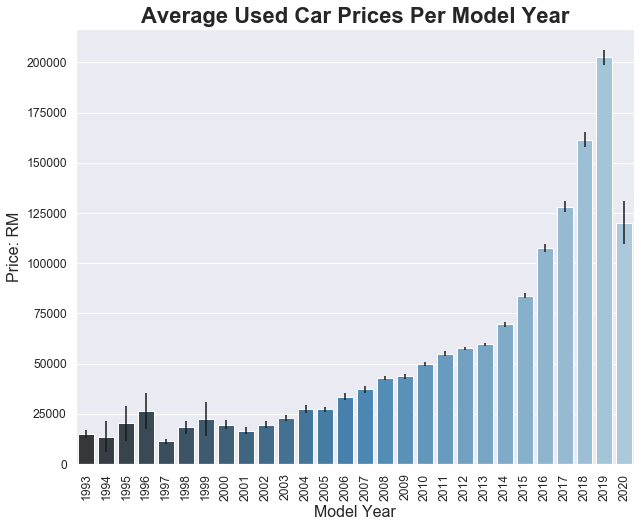

In [30]:
plt.figure(figsize=(10, 8));
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size":8});
sns.set(font_scale=1.1)
fig = sns.barplot(x=yearly_price['year'].astype(int),y= yearly_price['price'], yerr=sem_price['price'],capsize=4,errwidth=3,palette="Blues_d")
plt.ylabel('Price: RM',fontsize=16);
plt.xlabel('Model Year',fontsize=16);
plt.xticks(rotation=90)
plt.title('Average Used Car Prices Per Model Year',fontsize=22,fontweight='bold');
plt.savefig('priceyr.png', dpi=400)

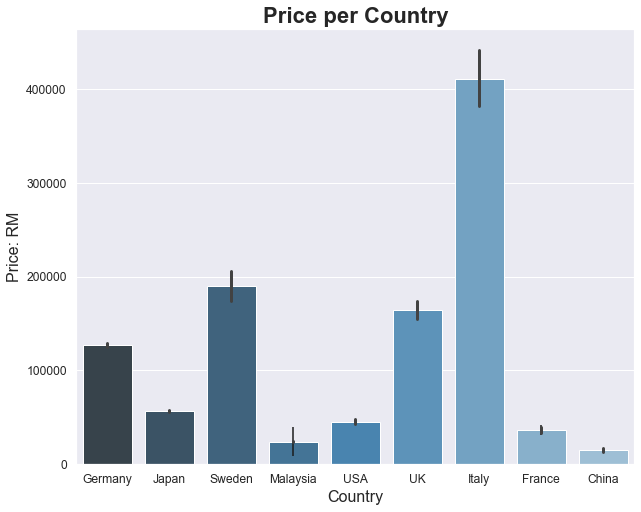

In [31]:
sem_price = data.groupby(['country'])['price'].sem().reset_index()
plt.figure(figsize=(10, 8));
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size":8});
sns.set(font_scale=1.1)
fig = sns.barplot(x=data['country'],y= data['price'],yerr=sem_price['price'],errwidth=3,palette="Blues_d")
plt.ylabel('Price: RM',fontsize=16);
plt.xlabel('Country',fontsize=16);
plt.xticks()
plt.title('Price per Country',fontsize=22,fontweight='bold');
plt.savefig('pricect.png',dpi=400)

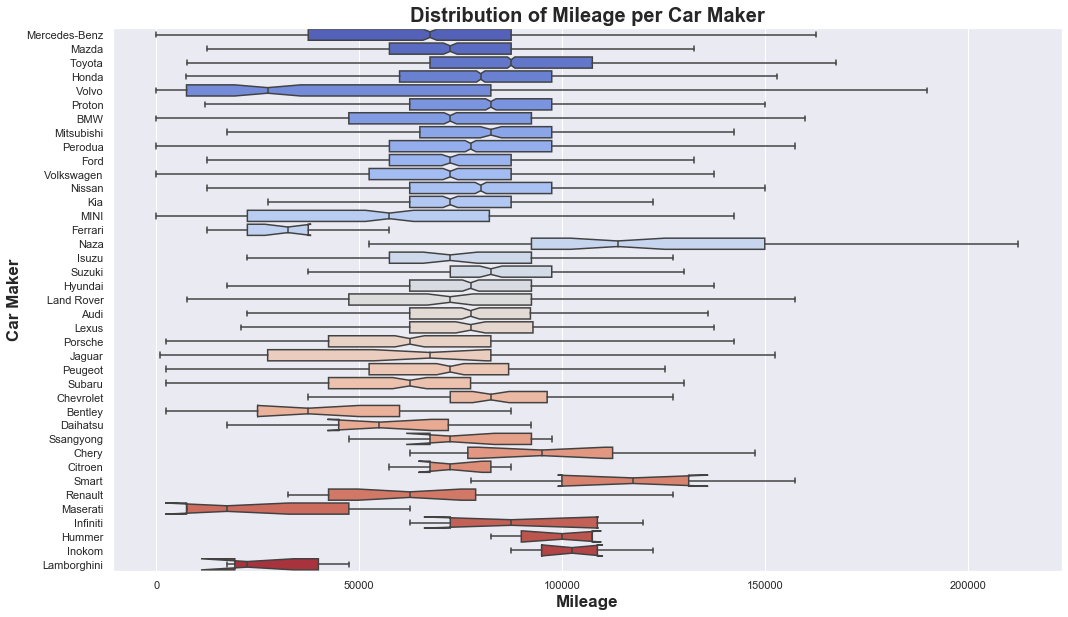

In [32]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(17, 10));
plot = sns.boxplot(x='mileage_kms',y='make',data=data,notch=True,orient='h',palette="coolwarm",showfliers=False)
plt.xlabel('Mileage',fontsize=17,fontweight="bold")
plt.ylabel('Car Maker',fontsize=17,fontweight="bold")
plt.title('Distribution of Mileage per Car Maker',fontsize=20,fontweight="bold")
plt.xlim()
plt.savefig('mileagect.png')
plt.show()

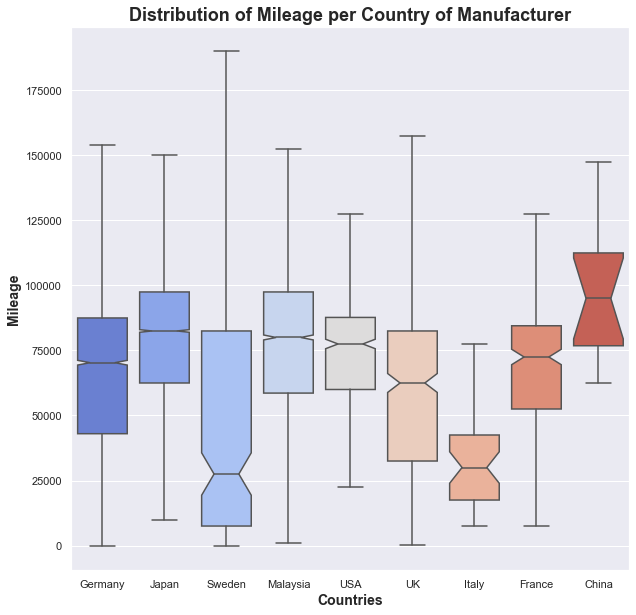

In [33]:
plt.figure(figsize=(10, 10));
sns.boxplot(x='country',y='mileage_kms',data=data,notch=True,palette="coolwarm",showfliers=False)
plt.xlabel('Countries',fontsize=14,fontweight="bold")
plt.ylabel('Mileage',fontsize=14,fontweight="bold")
plt.title('Distribution of Mileage per Country of Manufacturer',fontsize=18,fontweight="bold")
plt.xlim()
plt.savefig('hpmf.png',dpi=400)
plt.show()

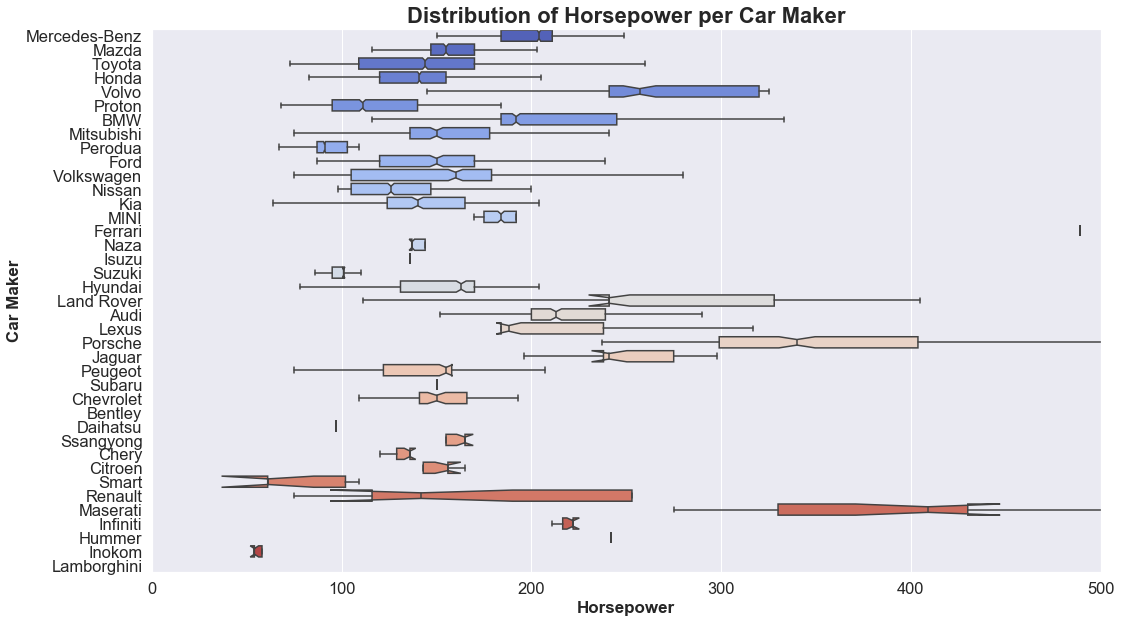

In [34]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(17, 10));
sns.boxplot(x='power_hp',y='make',data=data,notch=True,orient='h',palette='coolwarm',showfliers=False)
plt.xlabel('Horsepower',fontsize=17,fontweight="bold")
plt.ylabel('Car Maker',fontsize=17,fontweight="bold")
plt.title('Distribution of Horsepower per Car Maker',fontsize=22,fontweight="bold")
plt.xlim(0,500)
plt.savefig('hpmk.png',dpi=400)
plt.show()

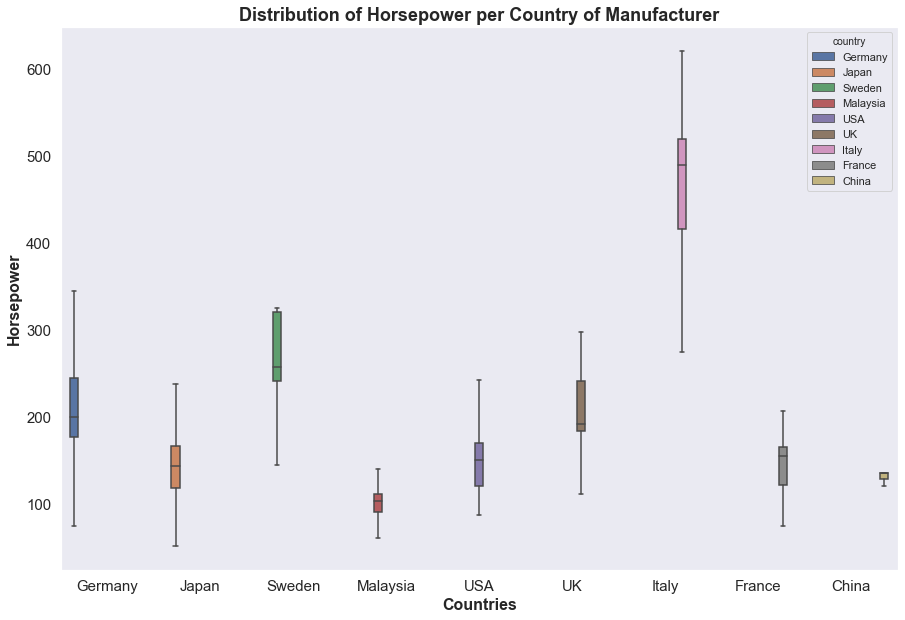

In [35]:
sns.set(style='dark')
plt.figure(figsize=(15, 10));
sns.boxplot(x='country',y='power_hp',data=data,showfliers=False,hue='country')
plt.xlabel('Countries',fontsize=16,fontweight="bold")
plt.ylabel('Horsepower',fontsize=16,fontweight="bold")
plt.title('Distribution of Horsepower per Country of Manufacturer',fontsize=18,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim()
plt.savefig('hpct.png',dpi=400)
plt.show()

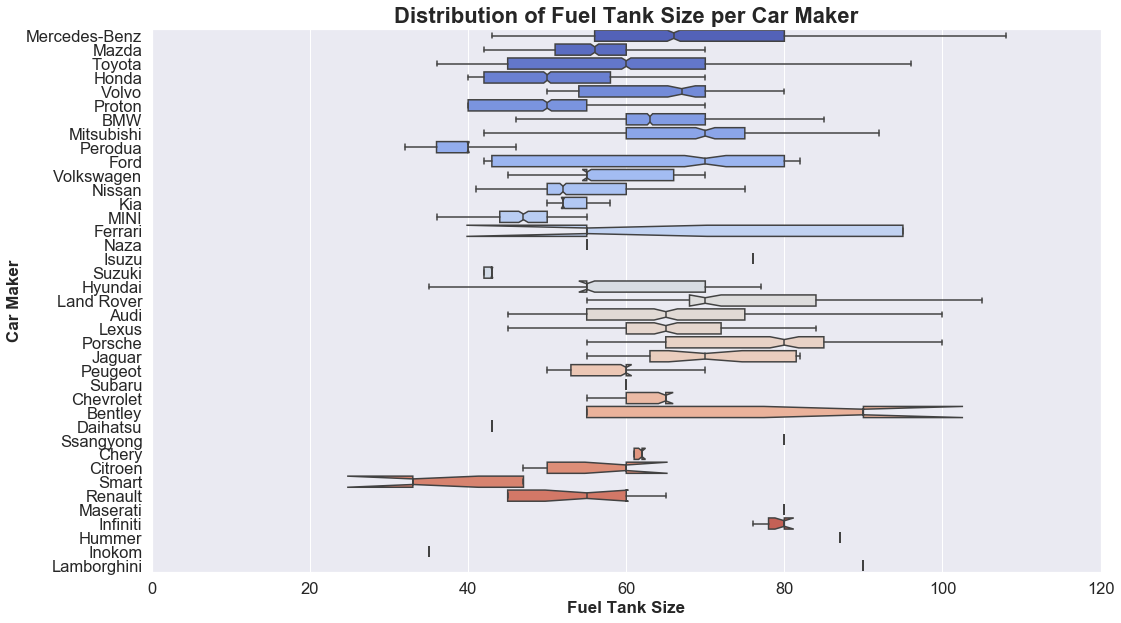

In [36]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(17, 10));
sns.boxplot(x='fuel_tanks_litres',y='make',data=data,notch=True,orient='h',palette='coolwarm',showfliers=False)
plt.xlabel('Fuel Tank Size',fontsize=17,fontweight="bold")
plt.ylabel('Car Maker',fontsize=17,fontweight="bold")
plt.title('Distribution of Fuel Tank Size per Car Maker',fontsize=22,fontweight="bold")
plt.xlim(0,120)
plt.savefig('ftmk.png',dpi=400)
plt.show()

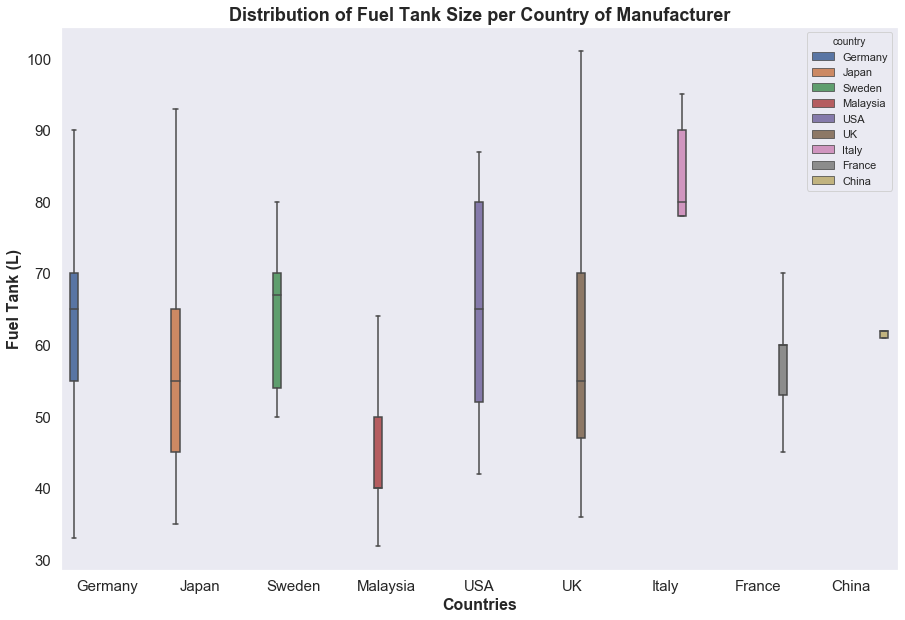

In [37]:
sns.set(style='dark')
plt.figure(figsize=(15, 10));
sns.boxplot(x='country',y='fuel_tanks_litres',data=data,showfliers=False,hue='country')
plt.xlabel('Countries',fontsize=16,fontweight="bold")
plt.ylabel('Fuel Tank (L)',fontsize=16,fontweight="bold")
plt.title('Distribution of Fuel Tank Size per Country of Manufacturer',fontsize=18,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim()
plt.savefig('ftct.png',dpi=400)
plt.show()

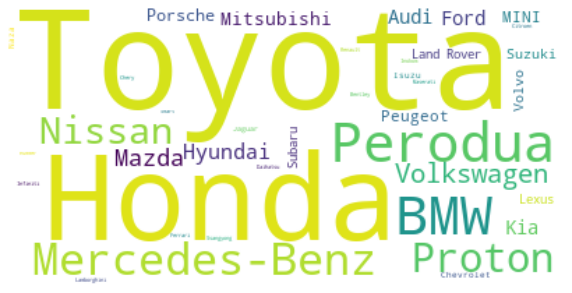

In [40]:
from PIL import Image
#Generate frequencies using counter
freqs = Counter(data['make'])
df = pd.DataFrame.from_dict(freqs, orient='index').reset_index()
df.columns = ['brands','freqs']
# Generate a word cloud with freqs
wc = WordCloud(background_color="white", max_words=1000, contour_width=2,contour_color='black')
wc.generate_from_frequencies(freqs)
plt.figure(figsize=(10, 8))
plt.axis("off")
make = data.groupby(['make'])['id'].count().sort_values(ascending=False).reset_index()
plt.savefig('wordcloudcar.png')
plt.imshow(wc, interpolation='bilinear');

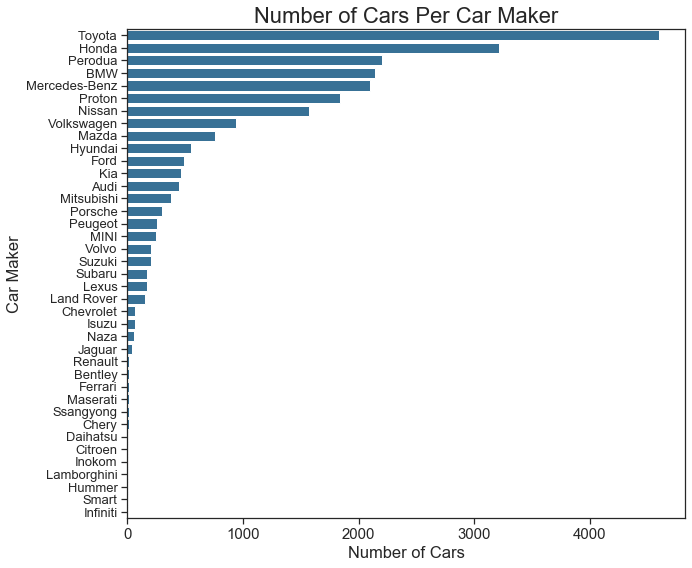

In [41]:
sns.set(font_scale = 1.25)
plt.figure(figsize=(10, 9));
sns.set_style("ticks",{"xtick.major.size": 12, "ytick.major.size":8})
make = data.groupby(['make'])['id'].count().sort_values(ascending=False).reset_index();
sns.barplot(make['id'],make['make'],orient='h',color="#2874A6");
plt.title("Number of Cars Per Car Maker",fontsize=22)
plt.ylabel('Car Maker',fontsize=16.5)
plt.xlabel('Number of Cars',fontsize=16.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.savefig('numberofcars.png')
plt.show()

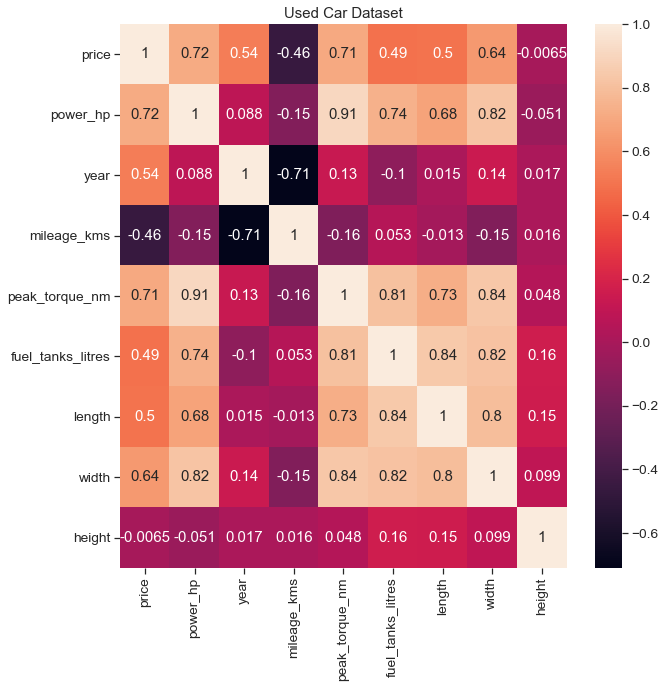

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
numeric_corr = data[['price','power_hp','year','mileage_kms','peak_torque_nm','fuel_tanks_litres','length','width','height']].corr(method='spearman');
sns.heatmap(numeric_corr,annot=True, ax=ax);
plt.title('Used Car Dataset');

## Part 4 - Machine Learning Models ##

In [44]:
df = pd.read_csv('intc_data.csv')
df.drop(columns=['Unnamed: 0','model', 'id'], inplace=True)
df.head()

,make,year,mileage_kms,transmission,price,engine_capacity,seat_capacity,colour,power_hp,peak_torque_nm,length,width,height,fuel_tanks_litres,country
0,Mercedes-Benz,2007,107500.0,Automatic,32999.0,1796.0,5.0,Silver,184.0,240.0,4818.0,1822.0,1452.0,65.0,Germany
1,Mercedes-Benz,2004,122500.0,Automatic,21500.0,1796.0,5.0,Blue,163.0,240.0,4526.0,1728.0,1426.0,62.0,Germany
2,Mazda,2017,62500.0,Automatic,59500.0,1496.0,5.0,Red,116.0,148.0,4320.0,1695.0,1470.0,44.0,Japan
3,Toyota,2014,102500.0,Automatic,49800.0,1497.0,5.0,White,109.0,141.0,4410.0,1700.0,1475.0,42.0,Japan
4,Honda,2013,77500.0,Automatic,72800.0,1997.0,5.0,Grey,155.0,190.0,4545.0,1820.0,1685.0,58.0,Japan


#### Handling Categorical Data (One Hot Encoding) ####

In [45]:
X = df[['year', 'mileage_kms', 'power_hp', 'transmission', 'make']]
Y = df.price
X = pd.get_dummies(data=X)

In [46]:
X.head()

,year,mileage_kms,power_hp,transmission_Automatic,transmission_Manual,make_Audi,make_BMW,make_Bentley,make_Chery,make_Chevrolet,...,make_Proton,make_Renault,make_Rolls-Royce,make_Smart,make_Ssangyong,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo
0,2007,107500.0,184.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004,122500.0,163.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,62500.0,116.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,102500.0,109.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2013,77500.0,155.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Splitting ####

In [47]:
# Splitting data into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

### Linear Regression ###

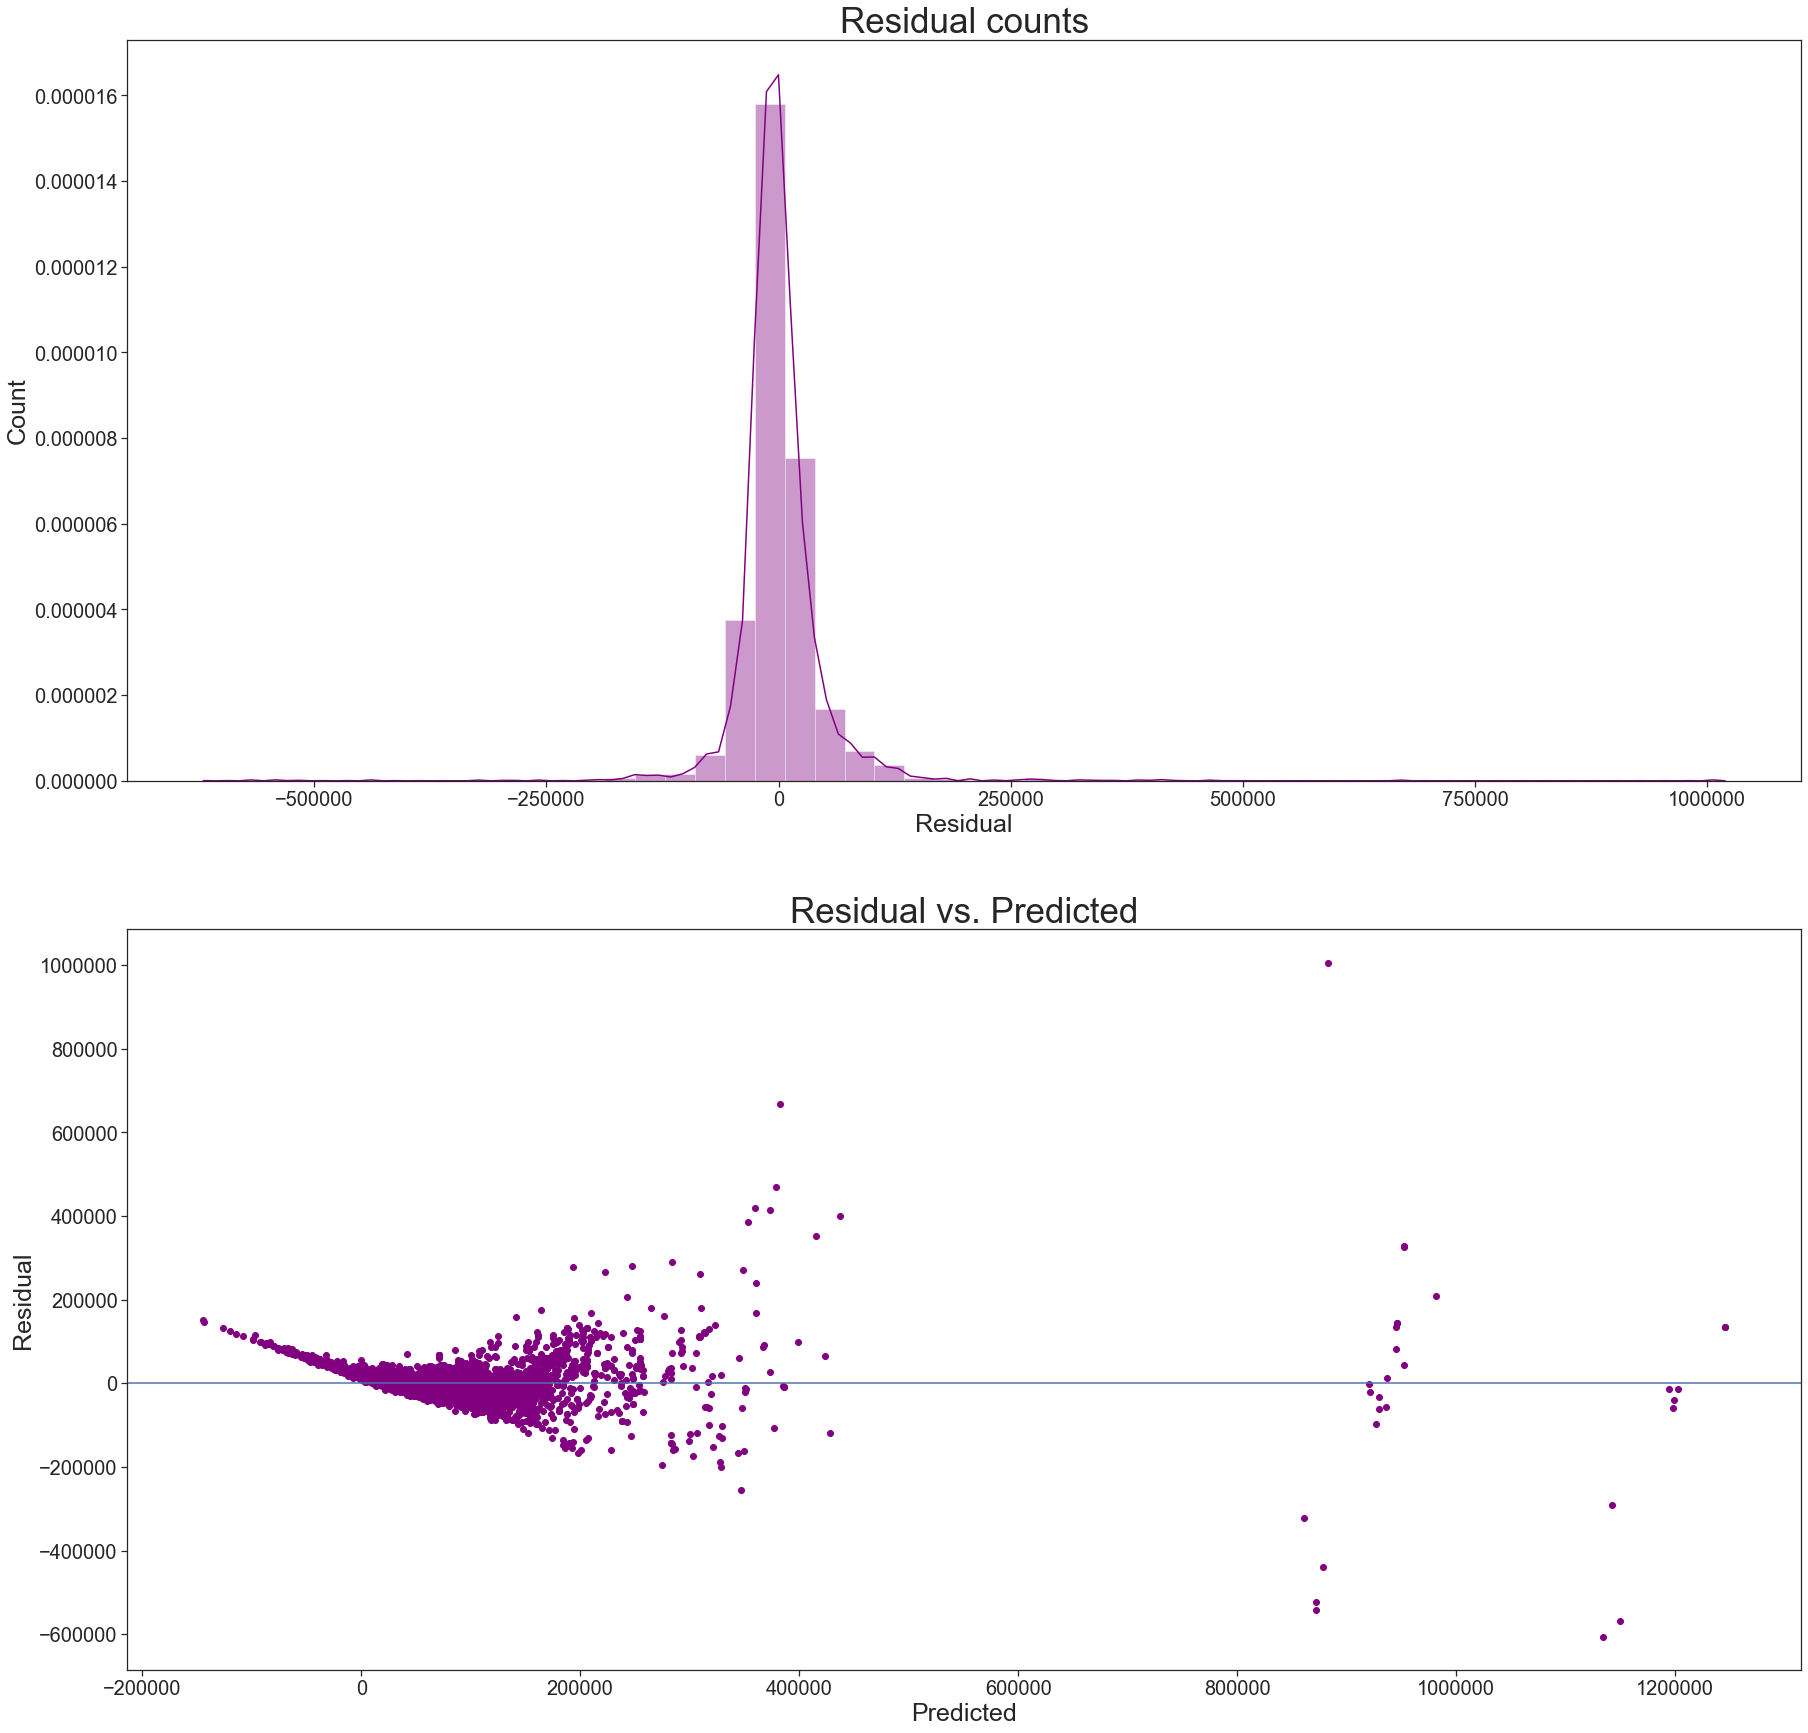

RMSE:
47455.31805068343


In [48]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='purple')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='purple')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [49]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.80


### KNN Regression ###

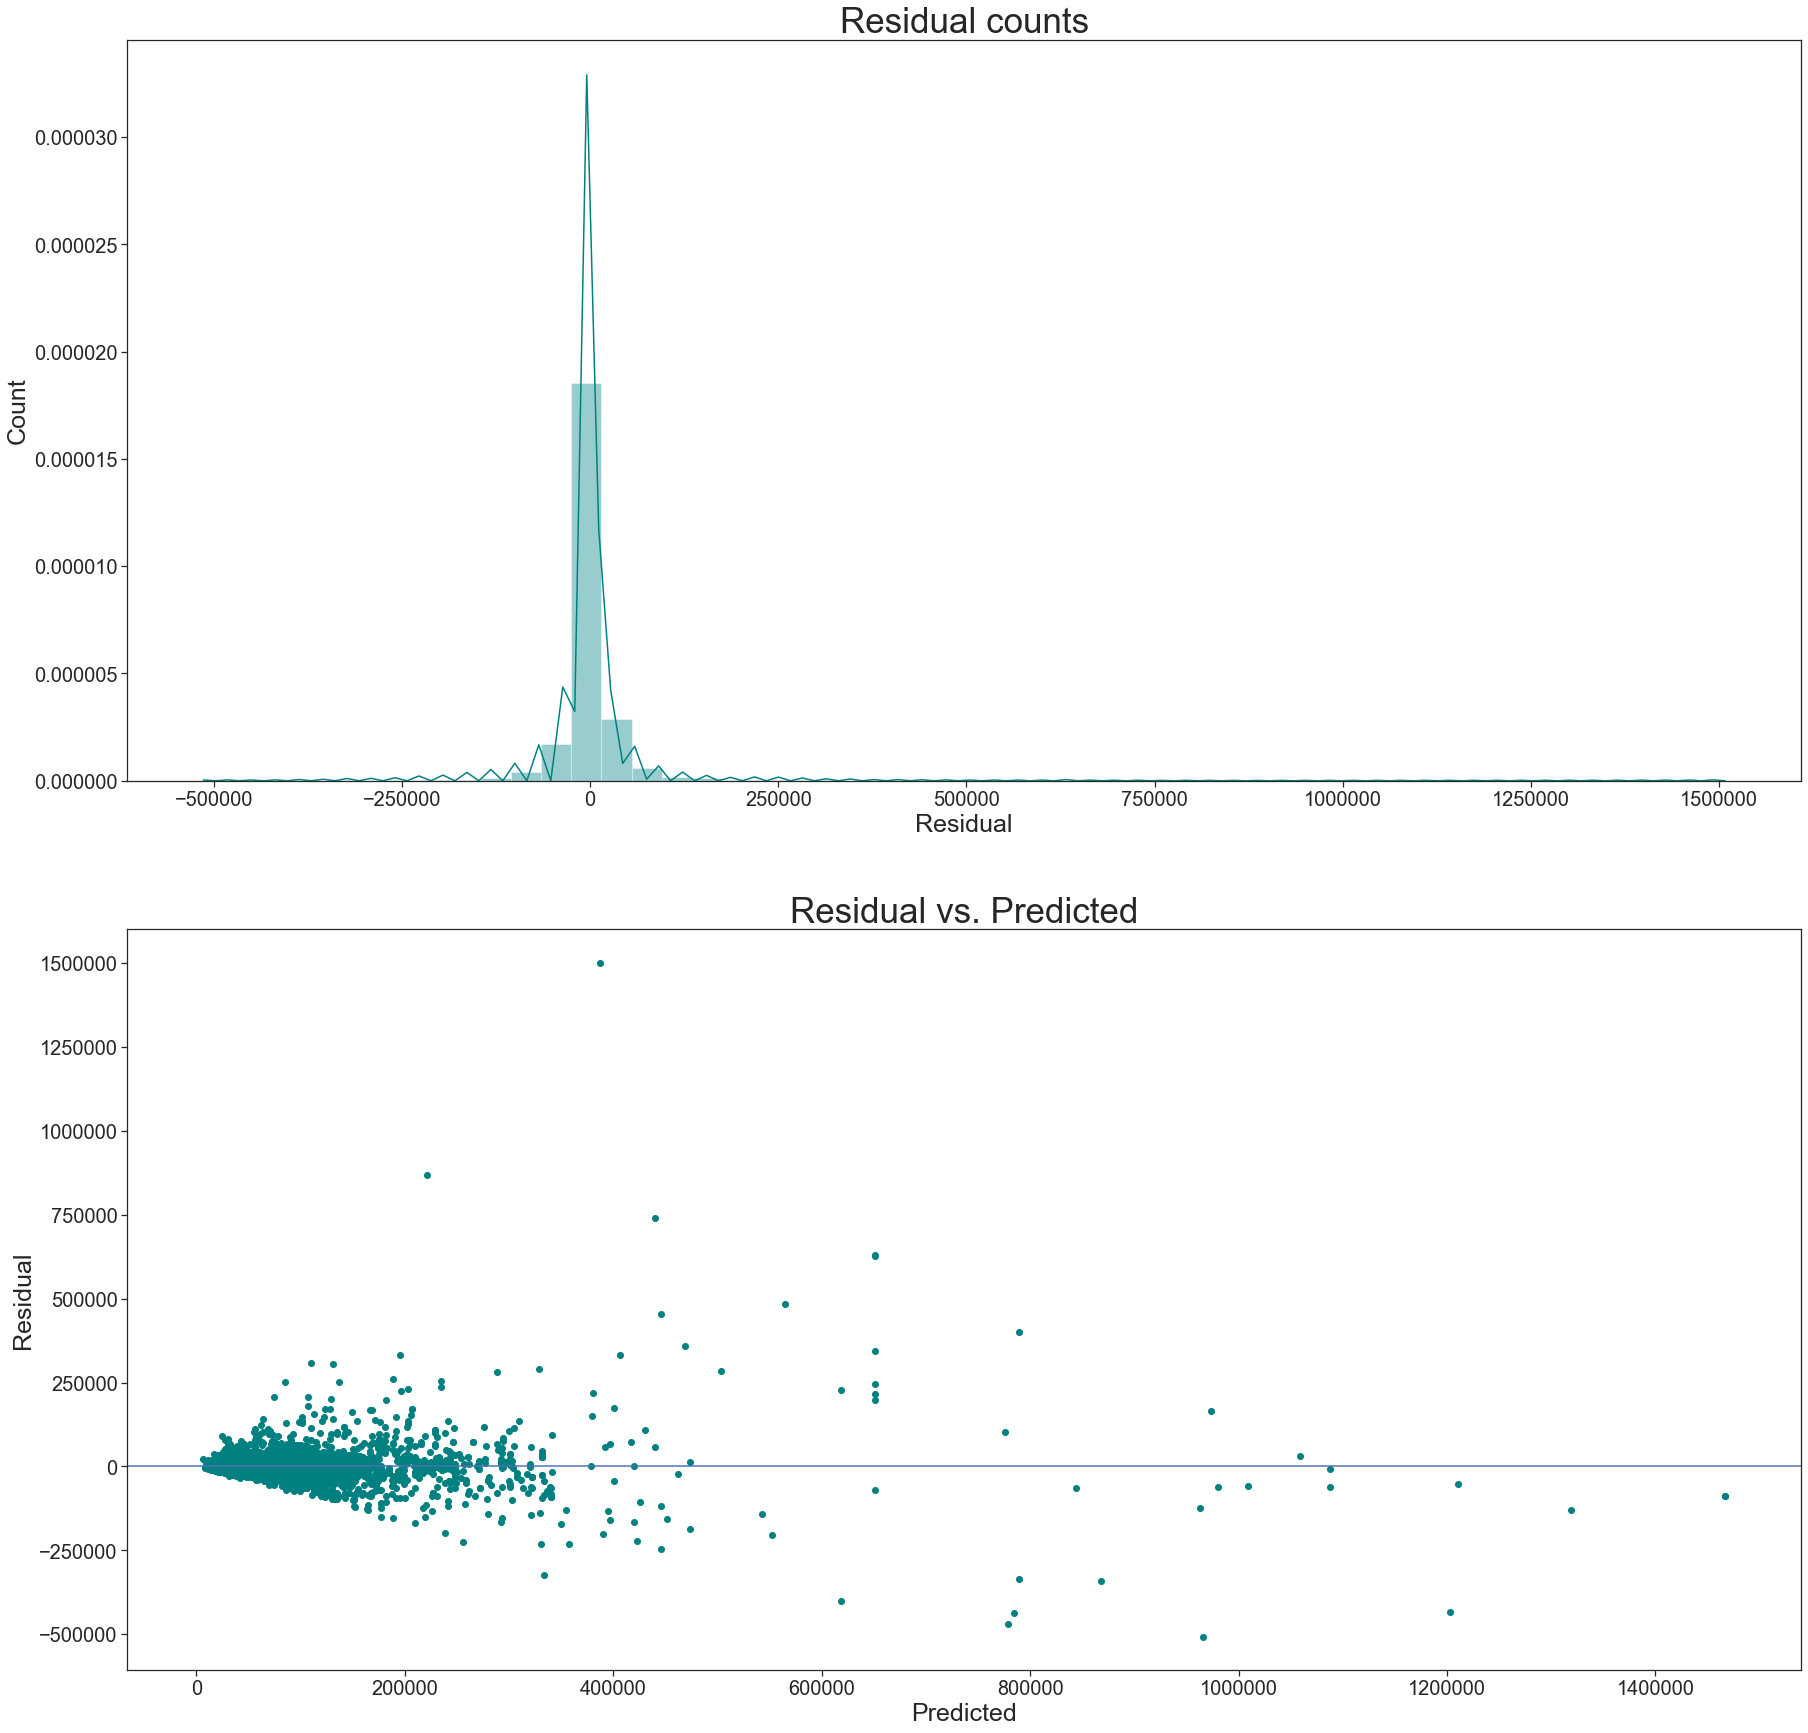

RMSE:
51296.55771626178


In [50]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=6) # value changed based on histogram with the lowest RMSE.
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [51]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.77


In [52]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

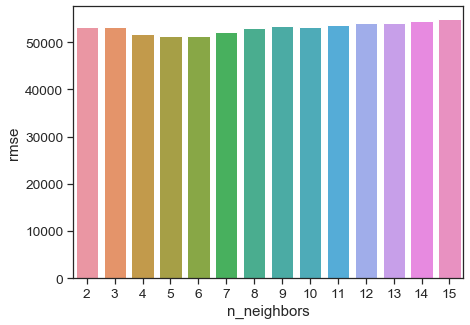

In [53]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(7,5))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

### Gradient Boosting Regresssion ###

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=12).mean())

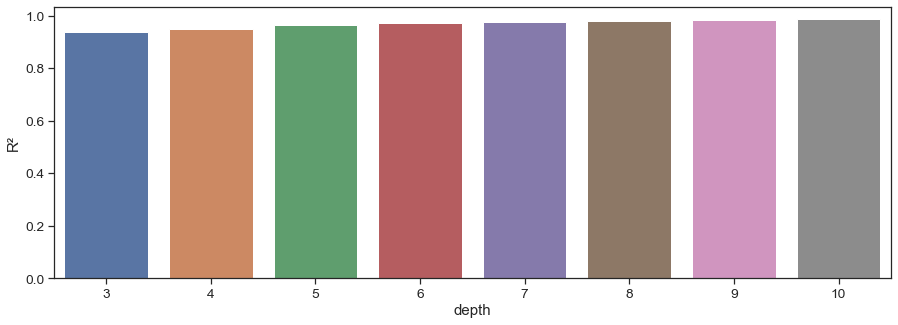

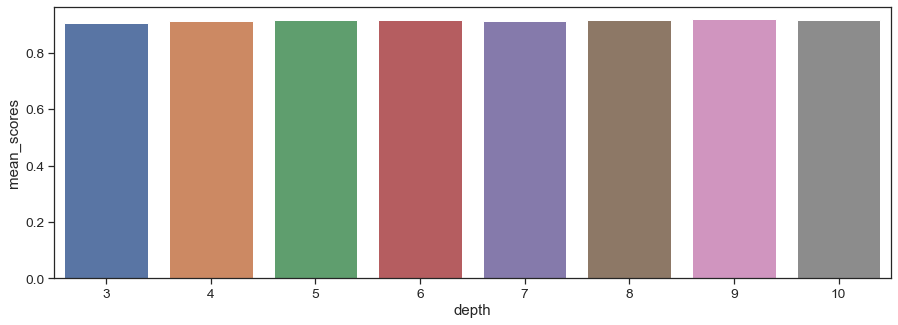

In [55]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

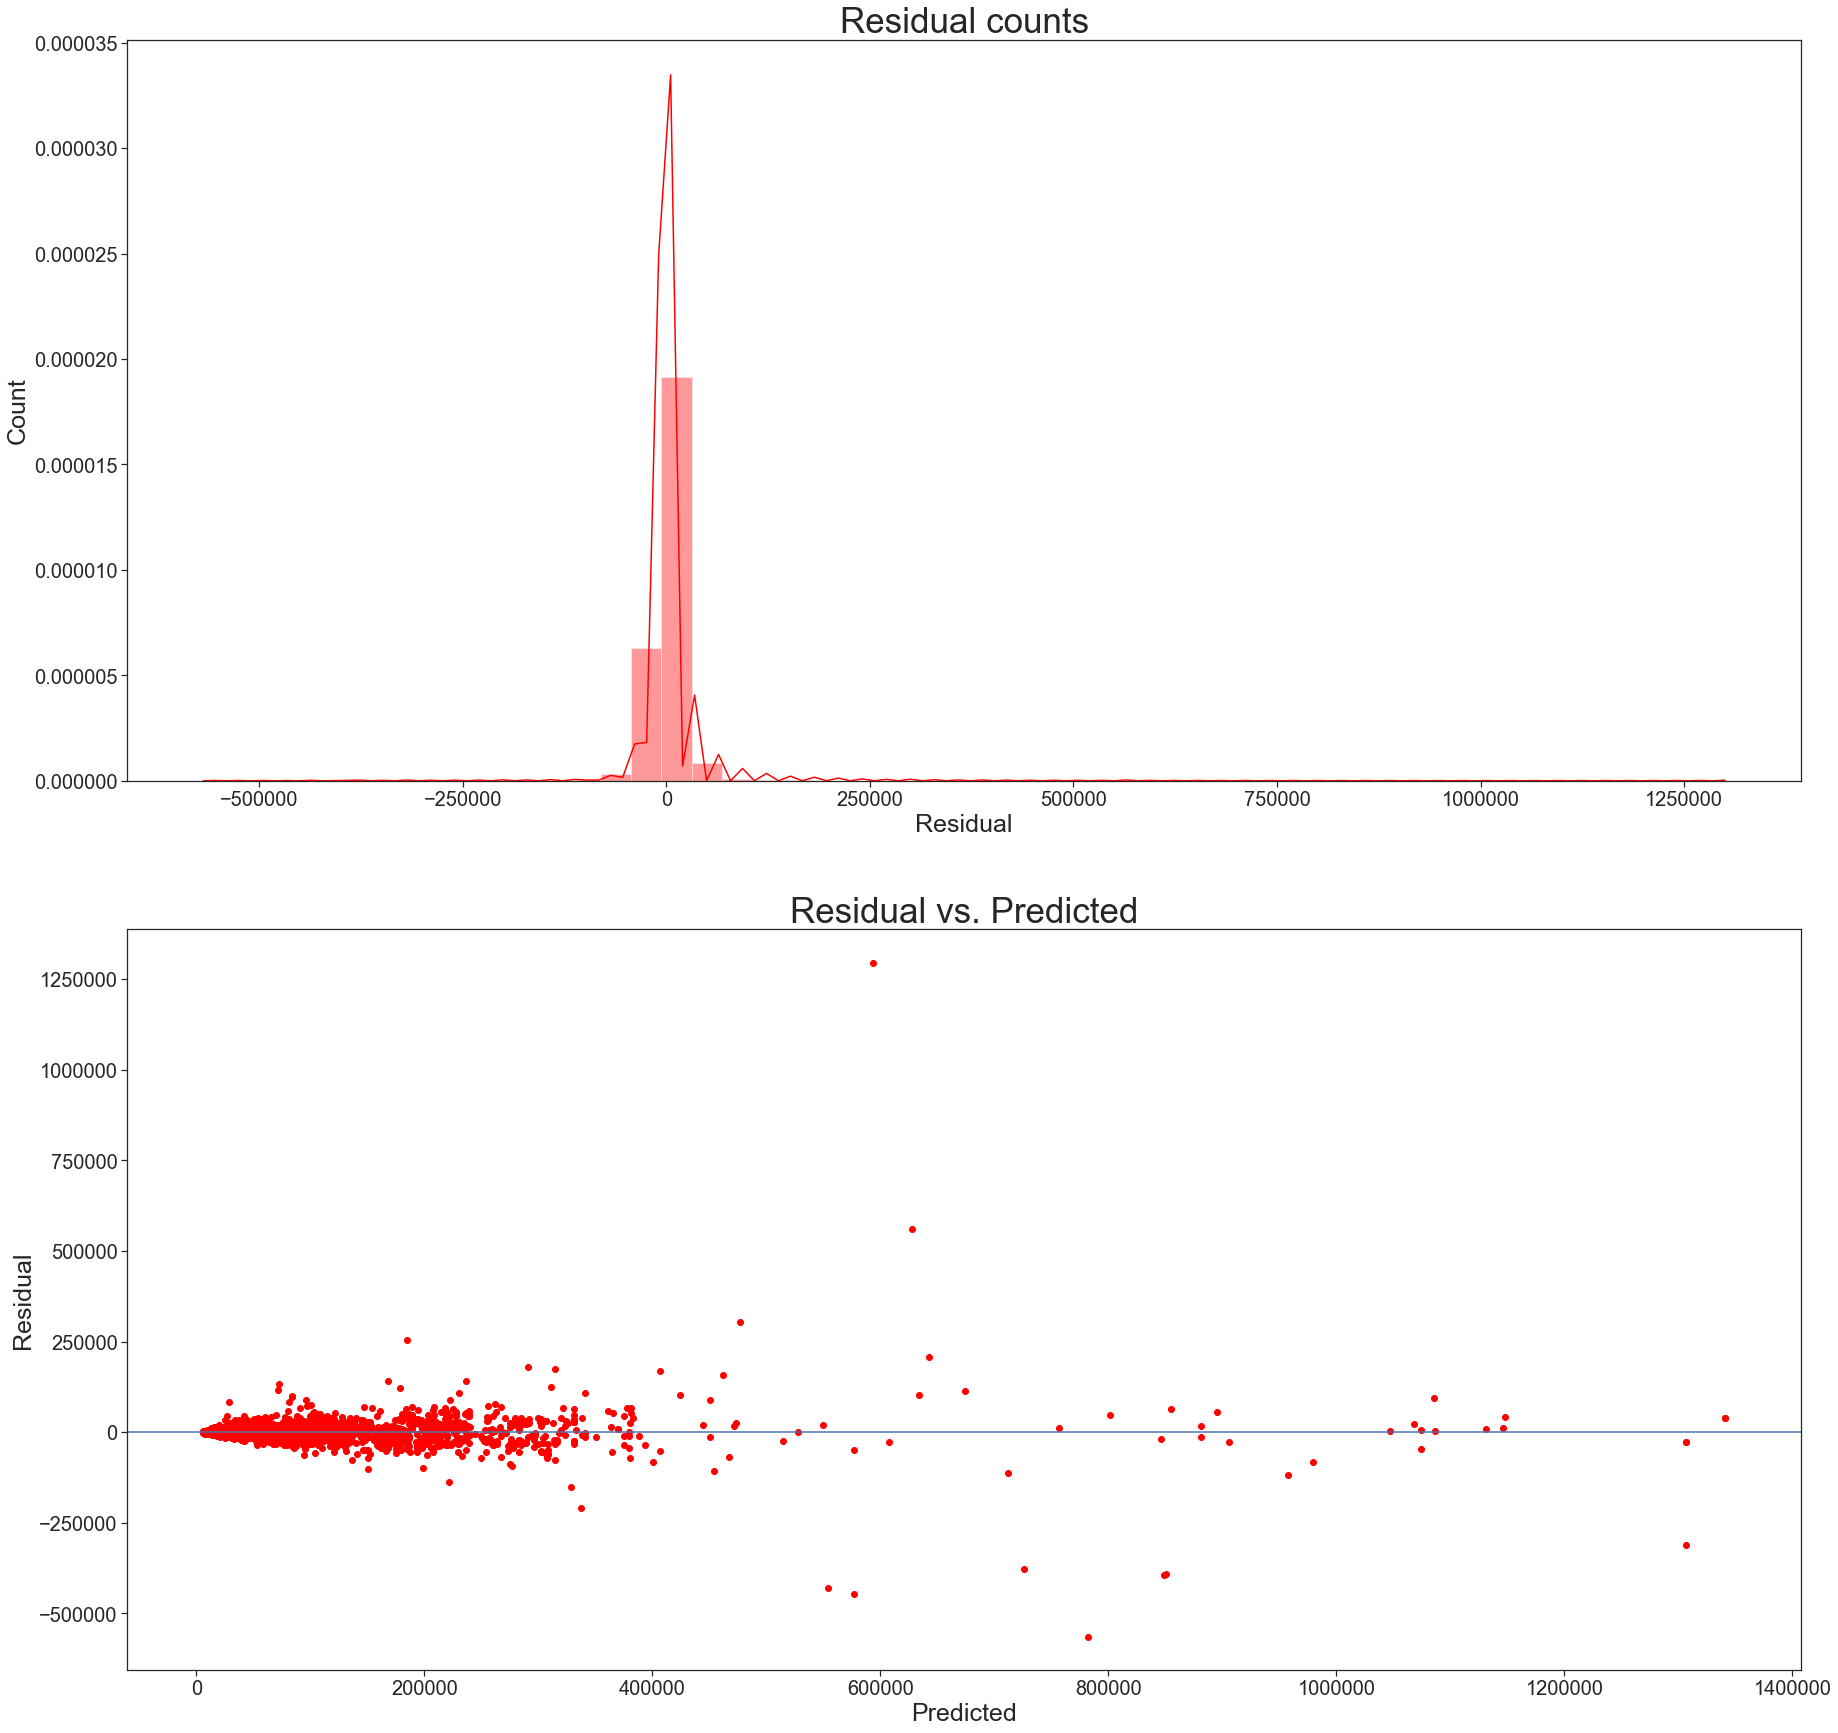


Cross Validation Scores:
[0.93595865 0.93315324 0.93628983 0.92580213 0.94913908 0.92815922
 0.88129617 0.89372612 0.90516046 0.84216686 0.92701318 0.94821555]

Mean Score:
0.9171733750178132

RMSE:
32352.010245899648


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='red')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='red')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [57]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.91


#### Model Comparison ####

<table class="table table-bordered">
    <thead>
      <tr>
        <th>Model</th>
        <th>Variance Score</th>
        <th>RMSE</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Multiple Linear Regression</td>
        <td>0.80</td>
        <td>47455.31</td>
      </tr>
      <tr>
        <td>KNN</td>
        <td>0.77</td>
        <td>51296.55</td>
      </tr>
      <tr style="color: green">
        <td><b>Gradient Boosting</b></td>
        <td><b>0.91</b></td>
        <td><b>32238.23</b></td>
      </tr>
    </tbody>
</table>

#### Prediction with best model (Gradient Boosting) ####

In [58]:
user_input = {'year':2010, 'mileage_kms':82499.5, 'power_hp':109.0, 'transmission':'Automatic', 'make':'Toyota'}
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(45)
    # set the numerical input as they are
    enc_input[0] = data['year']
    enc_input[1] = data['mileage_kms']
    enc_input[2] = data['power_hp']
    ##################### Make #########################
    # get the array of make categories
    make = df.make.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'make_'+data['make']
    # search for the index in columns name list 
    make_column_index = X.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    enc_input[make_column_index] = 1
    ##################### Transmission ####################
    # get the array of transmission
    transmission = df.transmission.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'transmission_'+data['transmission']
    # search for the index in columns name list 
    transmission_column_index = X.columns.tolist().index(redefinded_user_input)
    enc_input[transmission_column_index] = 1
    return enc_input

In [59]:
print(input_to_one_hot(user_input))

[2.01000e+03 8.24995e+04 1.09000e+02 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00]


In [60]:
a = input_to_one_hot(user_input)

In [61]:
price_pred = gbr.predict([a])

In [62]:
price_pred[0]

31753.181263918366